<h1>Importing Libraries</h1>

In [1292]:
# Import necessary libraries
import pandas as pd  # Data manipulation library
import numpy as np   # Numerical operations library
import seaborn as sns  # Statistical data visualization library
import matplotlib.pyplot as plt  # Basic plotting library
%matplotlib inline
# Plotly libraries for interactive visualizations
import plotly.express as px  # High-level interface for creating expressive visualizations
import plotly.graph_objects as go  # Provides more control over the creation of visualizations
from plotly.subplots import make_subplots  # Allows creation of subplots in Plotly
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings during code execution

In [1293]:
# Import necessary libraries for machine learning tasks
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder  # Encode labels with a value between 0 and n_classes-1
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score  # Accuracy classification score
from sklearn import metrics  # Various metrics for evaluating machine learning models
from sklearn.metrics import roc_curve  # Compute Receiver operating characteristic (ROC)
from sklearn.metrics import make_scorer,recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report  # Metrics for classification performance

In [1294]:
df = pd.read_csv('D:\Telecom Customer Churn Prediction AI CW\Dataset\Dataset of Churn telecom.csv')# Read the CSV file into a Pandas DataFrame

<h1>Understanding The Dataset</h1>

In [1295]:
df.head()# Display the first few rows of the DataFrame using df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1296]:
df.info()# Display concise summary information about the DataFrame using df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h1> Data Manupualtion and Cleaning</h1>

In [1297]:
# Calculate the count of missing values for each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [1298]:
# Drop the 'customerID' column from the DataFrame
df = df.drop(['customerID'], axis=1)

# Display the first few rows of the modified DataFrame using df.head()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1299]:
# Convert the 'TotalCharges' column to numeric, treating errors as NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check and display the count of missing values for each column after the conversion
missing_values_after_conversion = df.isnull().sum()
print("Missing values in each column after conversion:")
print(missing_values_after_conversion)

Missing values in each column after conversion:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [1300]:
# Identify and display rows with NaN values in the 'TotalCharges' column
nan_total_charges_rows = df[np.isnan(df['TotalCharges'])]
nan_total_charges_rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [1301]:
# Identify and display the indices of rows where 'tenure' is equal to 0
rows_with_tenure_zero_indices = df[df['tenure'] == 0].index
print(rows_with_tenure_zero_indices)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [1302]:
# Identify and display the indices of rows where 'tenure' is equal to 0 before dropping
rows_to_drop_indices = df[df['tenure'] == 0].index
print("Indices of rows to be dropped:")
print(rows_to_drop_indices)

# Drop the rows where 'tenure' is equal to 0 from the DataFrame
df.drop(labels=rows_to_drop_indices, axis=0, inplace=True)

# Confirm that there are no rows where 'tenure' is equal to 0 after dropping
remaining_rows_with_tenure_zero = df[df['tenure'] == 0].index
print("Remaining indices of rows where 'tenure' is 0:")
print(remaining_rows_with_tenure_zero)

Indices of rows to be dropped:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Remaining indices of rows where 'tenure' is 0:
Int64Index([], dtype='int64')


In [1303]:
# Fill missing values in the 'TotalCharges' column with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [1304]:
# Check and display the count of missing values for each column after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing values in each column after imputation:")
print(missing_values_after_imputation)

Missing values in each column after imputation:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [1305]:
# Map values in the 'SeniorCitizen' column to meaningful labels ("No" and "Yes")
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# Display the first few rows of the DataFrame after mapping values
df_head_after_mapping = df.head()
df_head_after_mapping


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1306]:
# Display descriptive statistics for the 'InternetService' column, including object (string) and boolean types
internet_service_description = df["InternetService"].describe(include=['object', 'bool'])
print(internet_service_description)

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


In [1307]:
# Select and display descriptive statistics for numerical columns: 'tenure', 'MonthlyCharges', 'TotalCharges'
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_description = df[numerical_cols].describe()
numerical_description


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<h1>Data Visualization</h1>

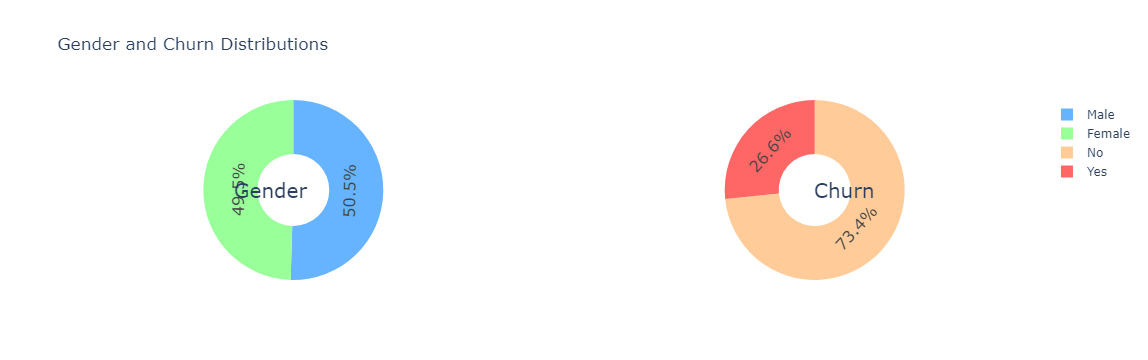

In [1308]:
# Define labels for 'gender' and 'Churn'
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Define custom colors for 'gender' and 'Churn' Pie charts
gender_colors = ['#66b3ff', '#99ff99']
churn_colors = ['#ffcc99', '#ff6666']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add Pie chart for 'gender' to the subplot
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender", marker=dict(colors=gender_colors)), 1, 1)

# Add Pie chart for 'Churn' to the subplot
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn", marker=dict(colors=churn_colors)), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Update layout with title and annotations
fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])

# Show the figure
fig.show()

In [1309]:
# Count the occurrences of 'No' in the 'Churn' column, grouped by 'gender'
churn_no_counts_by_gender = df["Churn"][df["Churn"] == "No"].groupby(by=df["gender"]).count()

# Display the counts of 'No' in 'Churn' for each gender
print(churn_no_counts_by_gender)

gender
Female    2544
Male      2619
Name: Churn, dtype: int64


In [1310]:
# Count the occurrences of 'Yes' in the 'Churn' column, grouped by 'gender'
churn_yes_counts_by_gender = df["Churn"][df["Churn"] == "Yes"].groupby(by=df["gender"]).count()

# Display the counts of 'Yes' in 'Churn' for each gender
print(churn_yes_counts_by_gender)

gender
Female    939
Male      930
Name: Churn, dtype: int64


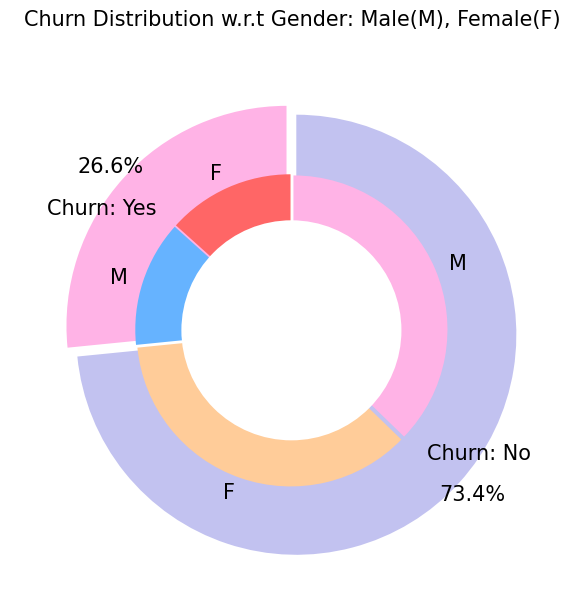

In [1311]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Define data for Churn distribution
churn_labels = ["Churn: Yes", "Churn: No"]
churn_values = [1869, 5163]

# Define data for Gender distribution
gender_labels = ["F", "M", "F", "M"]
gender_sizes = [939, 930, 2544, 2619]

# Define colors for Churn and Gender distributions
churn_colors = ['#ffb3e6', '#c2c2f0']  # Changed colors for Churn
gender_colors = ['#ff6666', '#66b3ff', '#ffcc99', '#ffb3e6']  # Changed colors for Gender

# Define explode values for Churn and Gender distributions
explode_churn = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)

# Set text properties
textprops = {"fontsize": 15}

# Plot Churn distribution
plt.pie(churn_values, labels=churn_labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=churn_colors, startangle=90, frame=True, explode=explode_churn, radius=10, textprops=textprops,
        counterclock=True)

# Plot Gender distribution
plt.pie(gender_sizes, labels=gender_labels, colors=gender_colors, startangle=90,
        explode=explode_gender, radius=7, textprops=textprops, counterclock=True)

# Draw a circle in the center
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set plot title
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Set axis properties
plt.axis('equal')
plt.tight_layout()

# Display the plot
plt.show()

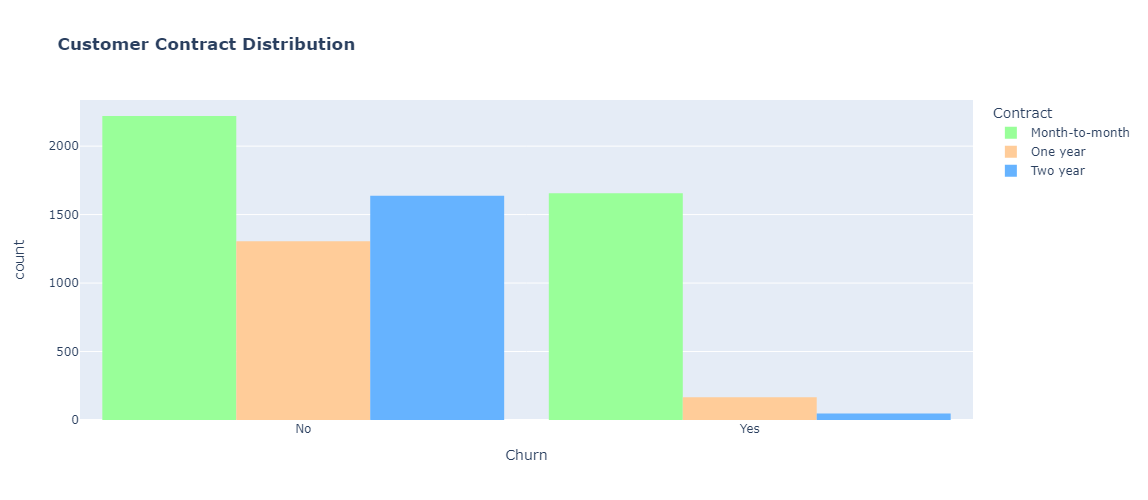

In [1312]:
# Create a histogram using Plotly Express with custom colors
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer Contract Distribution</b>",
                   color_discrete_sequence=['#99ff99', '#ffcc99', '#66b3ff'])

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

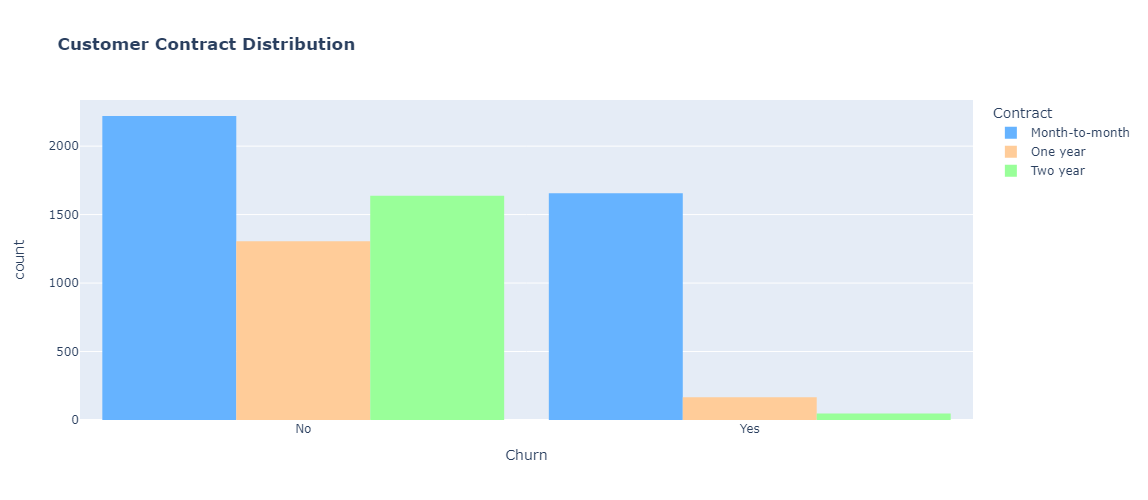

In [1313]:
# Create a histogram using Plotly Express with a different color for 'Contract' groups
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer Contract Distribution</b>",
                   color_discrete_map={'Month-to-month': '#66b3ff', 'One year': '#ffcc99', 'Two year': '#99ff99'})

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

In [1314]:
# Filter rows where 'gender' is "Male" and select columns "InternetService" and "Churn", then count occurrences
male_internet_churn_counts = df[df["gender"] == "Male"][["InternetService", "Churn"]].value_counts()

# Display the counts of unique combinations of "InternetService" and "Churn" for male customers
print(male_internet_churn_counts)

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64


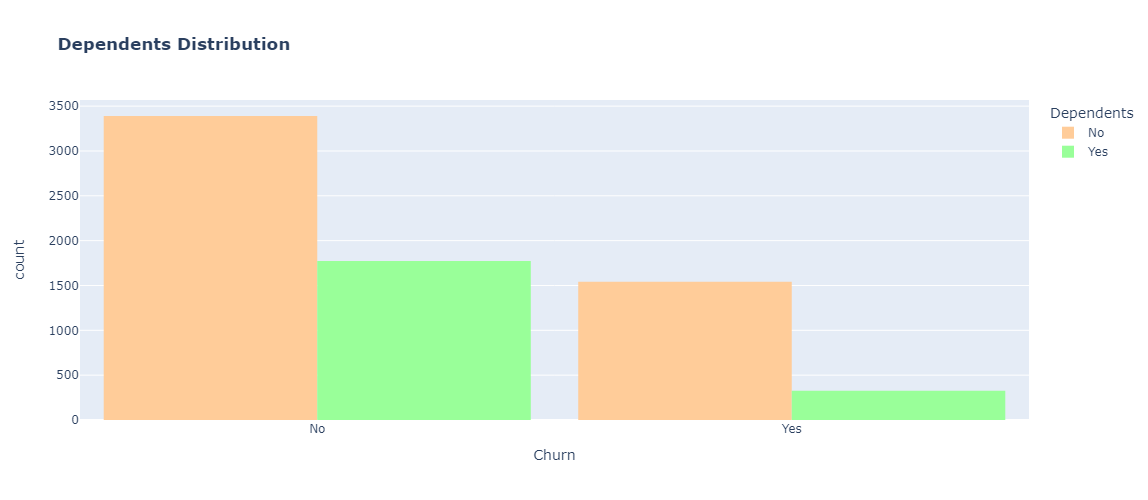

In [1315]:
# Define a custom color map for 'Dependents' distribution
dependents_color_map = {"Yes": "#99ff99", "No": "#ffcc99"}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'Dependents'
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents Distribution</b>",
                   color_discrete_map=dependents_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

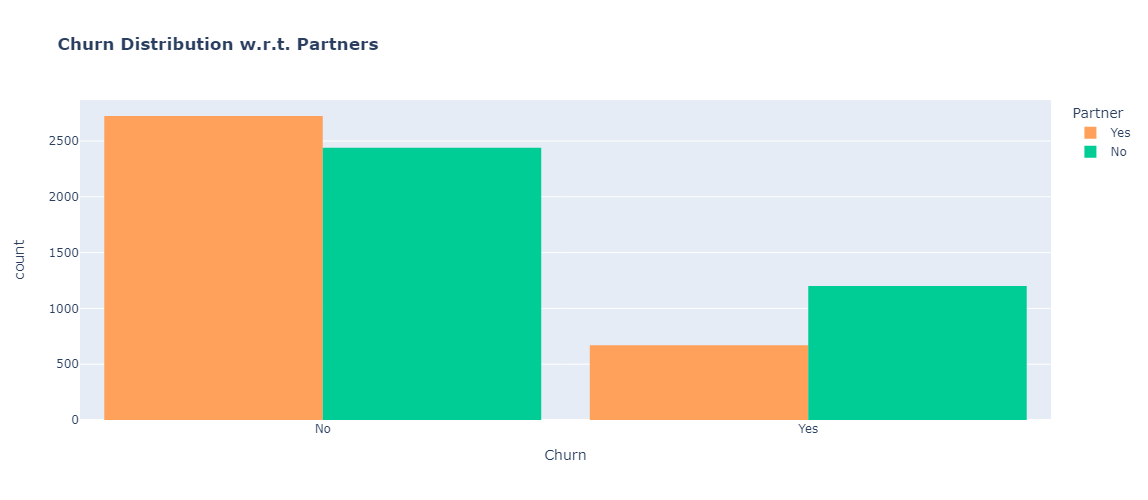

In [1316]:
# Define a custom color map for 'Partner' distribution
partner_color_map = {"Yes": '#FFA15A', "No": '#00CC96'}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'Partner'
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn Distribution w.r.t. Partners</b>",
                   color_discrete_map=partner_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

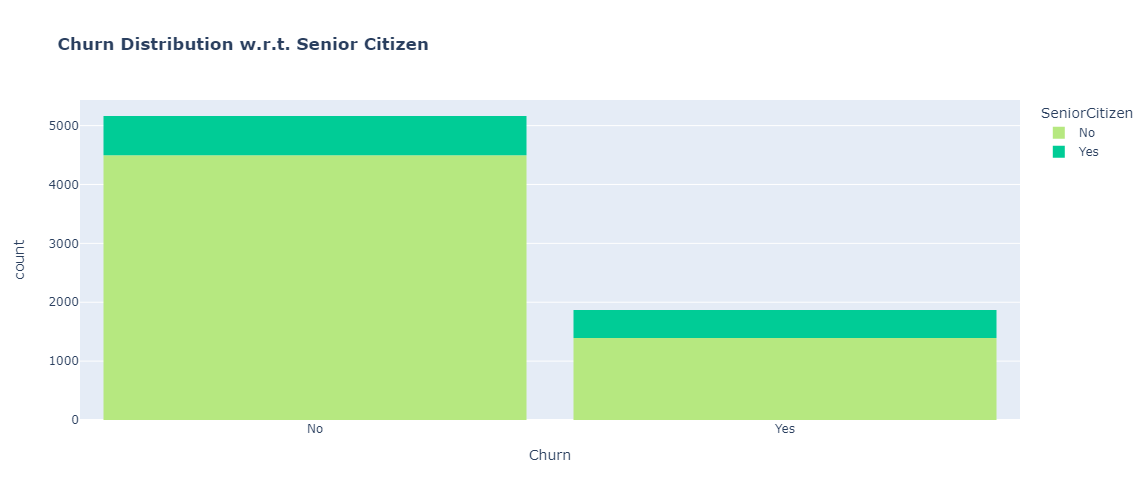

In [1317]:
# Define a custom color map for 'SeniorCitizen' distribution
senior_citizen_color_map = {"Yes": '#00CC96', "No": '#B6E880'}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'SeniorCitizen'
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn Distribution w.r.t. Senior Citizen</b>",
                   color_discrete_map=senior_citizen_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

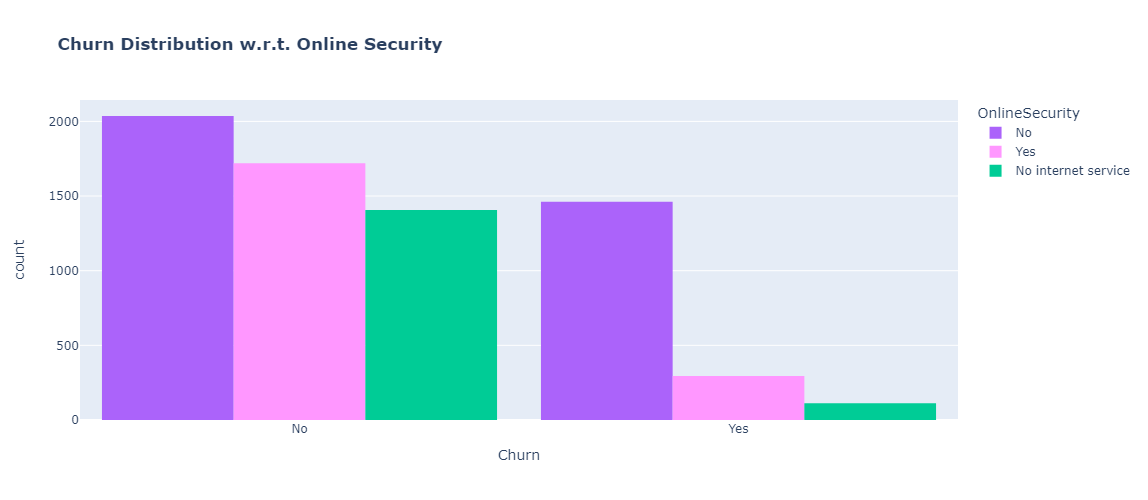

In [1318]:
# Define a custom color map for 'OnlineSecurity' distribution
online_security_color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'OnlineSecurity'
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn Distribution w.r.t. Online Security</b>",
                   color_discrete_map=online_security_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

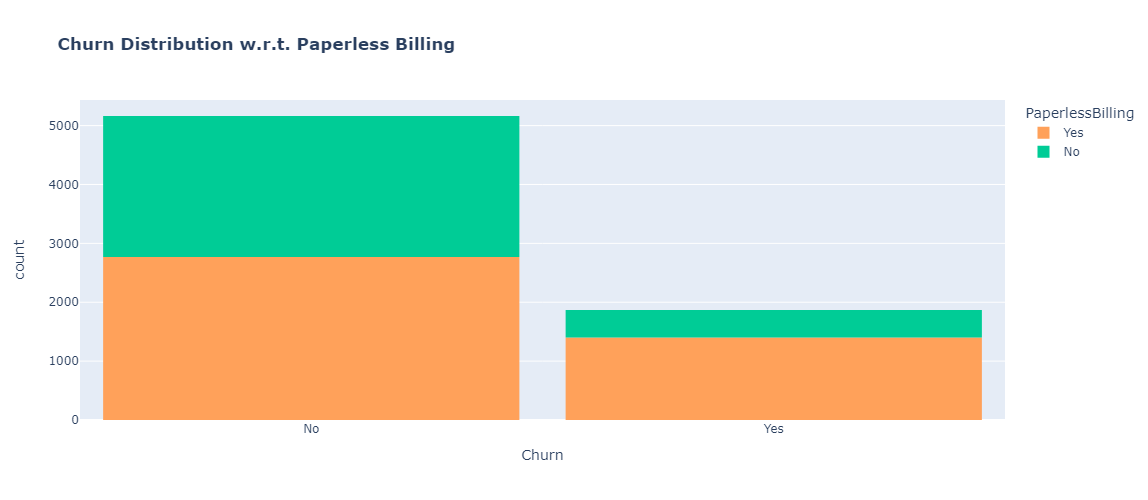

In [1319]:
# Define a custom color map for 'PaperlessBilling' distribution
paperless_billing_color_map = {"Yes": '#FFA15A', "No": '#00CC96'}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'PaperlessBilling'
fig = px.histogram(df, x="Churn", color="PaperlessBilling", title="<b>Churn Distribution w.r.t. Paperless Billing</b>",
                   color_discrete_map=paperless_billing_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

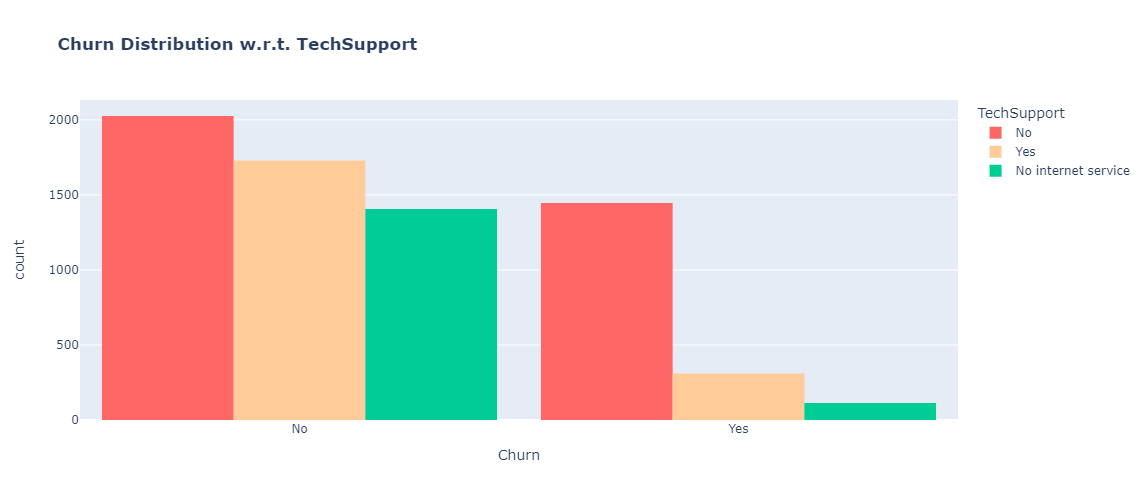

In [1320]:
# Define a custom color map for 'TechSupport' distribution
tech_support_color_map = {"Yes": '#FFCC99', "No": '#FF6666'}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'TechSupport'
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group", title="<b>Churn Distribution w.r.t. TechSupport</b>",
                   color_discrete_map=tech_support_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

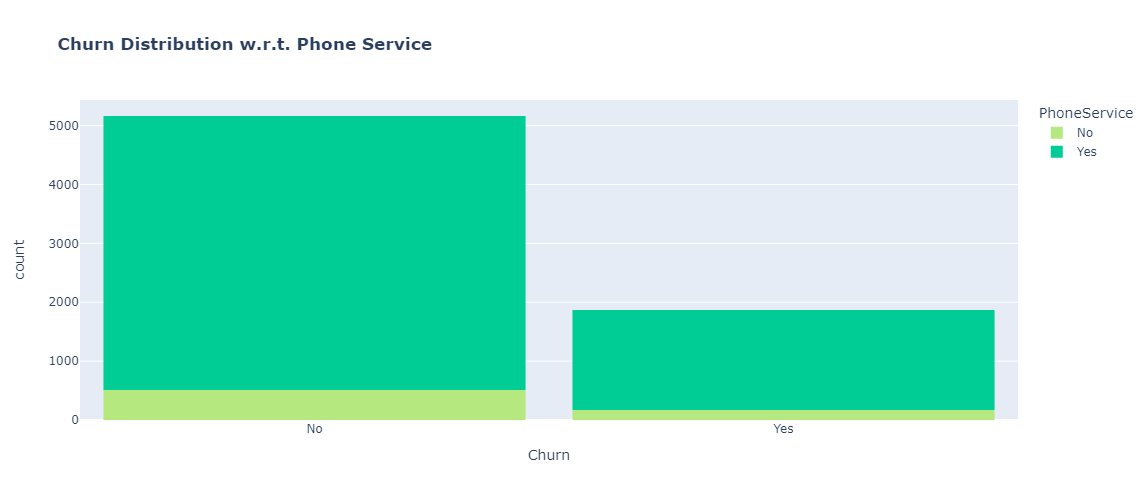

In [1321]:
# Define a custom color map for 'PhoneService' distribution
phone_service_color_map = {"Yes": '#00CC96', "No": '#B6E880'}  # Updated colors

# Create a histogram using Plotly Express with custom colors for 'PhoneService'
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn Distribution w.r.t. Phone Service</b>",
                   color_discrete_map=phone_service_color_map)

# Update layout with specific width, height, and bargap
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()

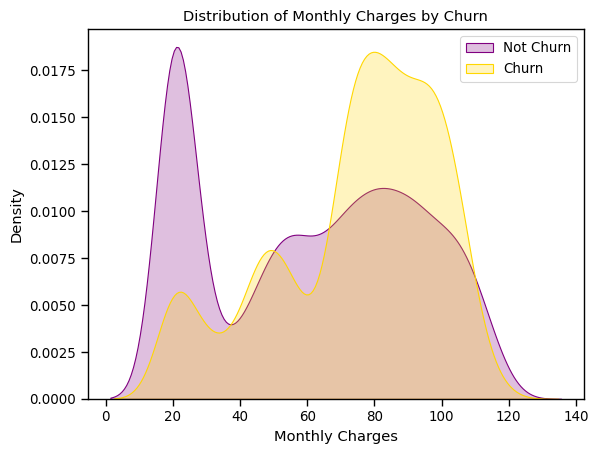

In [1322]:
# Set the seaborn context and font scale
sns.set_context("paper", font_scale=1.1)

# Create a kernel density plot using seaborn for 'MonthlyCharges' based on 'Churn' status
density_plot = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="Purple", shade=True);
density_plot = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], ax=density_plot, color="Gold", shade=True);

# Add legend and labels to the plot
density_plot.legend(["Not Churn", "Churn"], loc='upper right')
density_plot.set_ylabel('Density')
density_plot.set_xlabel('Monthly Charges')
density_plot.set_title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

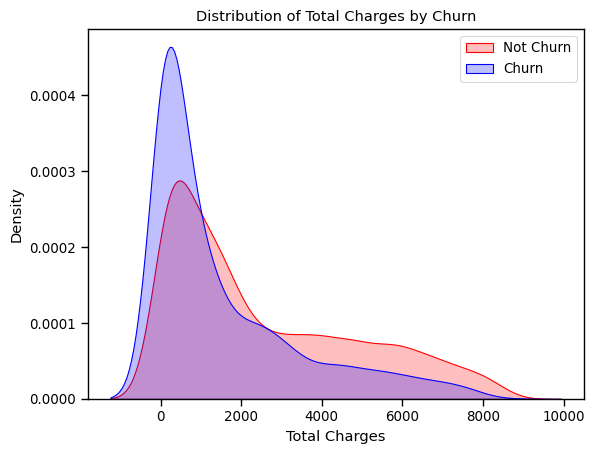

In [1323]:
# Set the seaborn context and font scale
sns.set_context("paper", font_scale=1.1)

# Create a kernel density plot using seaborn for 'TotalCharges' based on 'Churn' status
total_charges_plot = sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], color="Red", shade=True);
total_charges_plot = sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], ax=total_charges_plot, color="Blue", shade=True);

# Add legend and labels to the plot
total_charges_plot.legend(["Not Churn", "Churn"], loc='upper right')
total_charges_plot.set_ylabel('Density')
total_charges_plot.set_xlabel('Total Charges')
total_charges_plot.set_title('Distribution of Total Charges by Churn')

# Display the plot
plt.show()

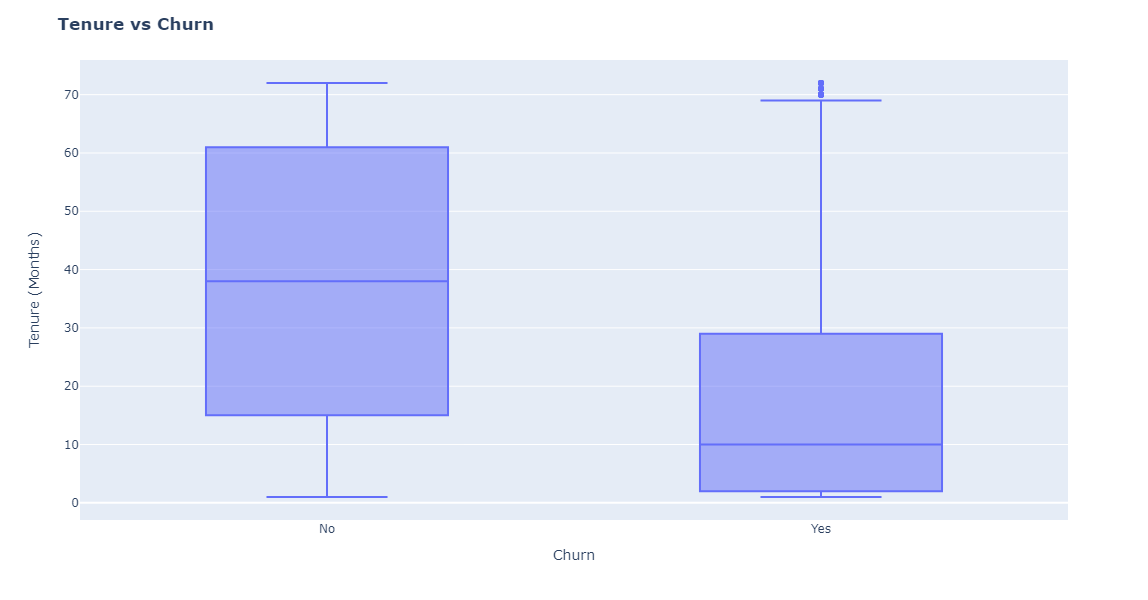

In [1324]:
# Create a box plot using Plotly Express for 'tenure' vs 'Churn'
tenure_churn_box = px.box(df, x='Churn', y='tenure')

# Update y-axis properties
tenure_churn_box.update_yaxes(title_text='Tenure (Months)', row=1, col=1)

# Update x-axis properties
tenure_churn_box.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
tenure_churn_box.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

# Display the box plot
tenure_churn_box.show()

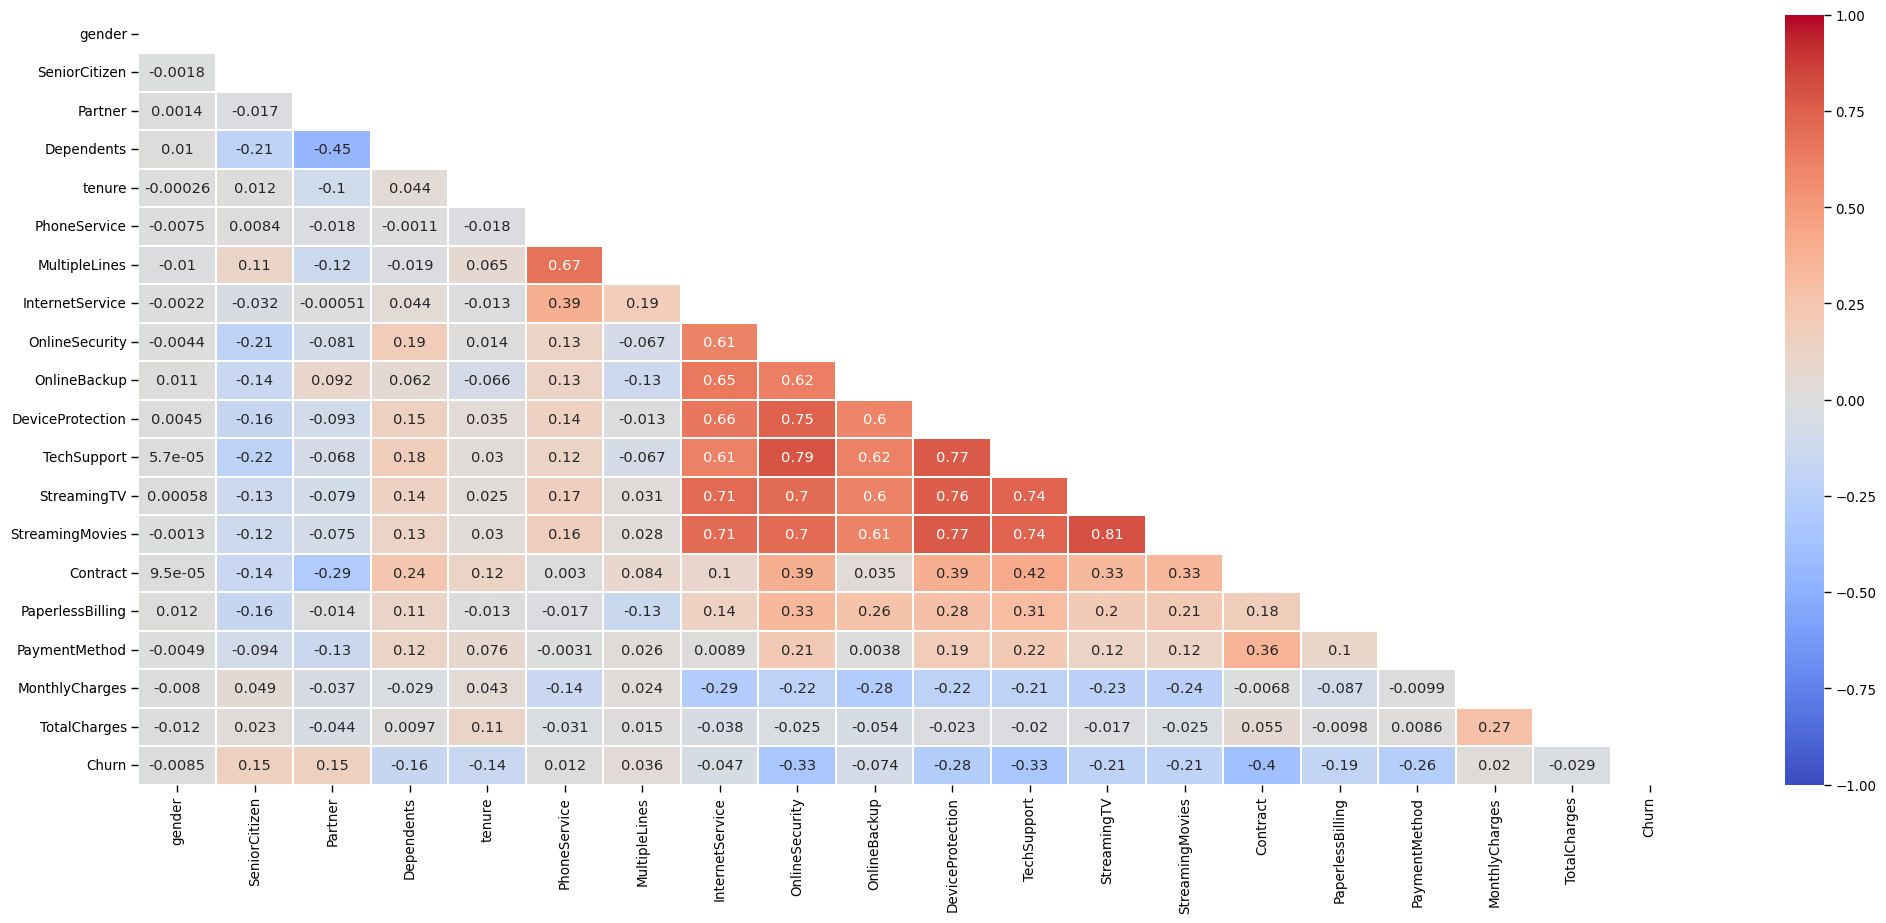

In [1325]:
# Set the figure size
plt.figure(figsize=(25, 10))

# Compute the correlation matrix after applying factorization
corr_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create a heatmap using seaborn
heatmap_ax = sns.heatmap(corr_matrix, mask=mask, xticklabels=corr_matrix.columns,
                        yticklabels=corr_matrix.columns, annot=True, linewidths=.2,
                        cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.show()

<H1> Data Preprocessing</H1>

<h2>Splitting the data into train and test sets</h2>

In [1326]:
def object_to_int(dataframe_series):
    # Check if the dtype of the series is 'object'
    if dataframe_series.dtype == 'object':
        # Transform the series using LabelEncoder
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    
    # Return the transformed or unchanged series
    return dataframe_series

In [1327]:
# Apply the object_to_int function to each column in the DataFrame using lambda expression
df = df.apply(lambda x: object_to_int(x))

# Display the head of the transformed DataFrame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [1328]:
# Set the figure size for the plot
plt.figure(figsize=(14, 7))

# Compute the correlation of each column with the 'Churn' column and sort in descending order
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [1329]:
# Create feature matrix X by dropping the 'Churn' column from the DataFrame
X = df.drop(columns=['Churn'])

# Create target variable y by extracting the values of the 'Churn' column
y = df['Churn'].values

In [1330]:
# Split the data into training and testing sets using train_test_split
# - X_train: Features for training
# - X_test: Features for testing
# - y_train: Target variable for training
# - y_test: Target variable for testing
# - test_size: Percentage of data to allocate for testing (30% in this case)
# - random_state: Seed for reproducibility
# - stratify: Ensures that the distribution of the target variable is similar in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)


In [1331]:
def distplot(feature, frame, color='r'):
    # Set the figure size to 8x3 inches
    plt.figure(figsize=(8, 3))

    # Set the title for the distribution plot, indicating the feature name
    plt.title("Distribution for {}".format(feature))

    # Create a distribution plot using seaborn for the specified feature in the DataFrame
    ax = sns.distplot(frame[feature], color=color)

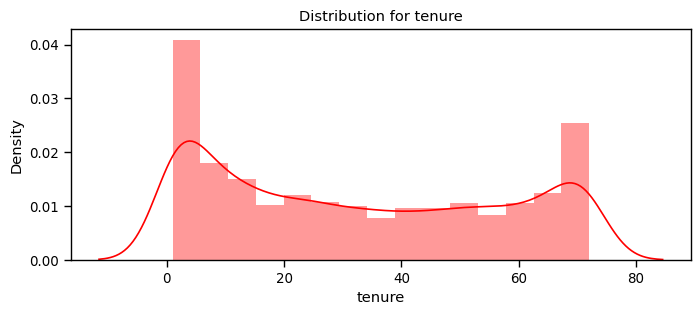

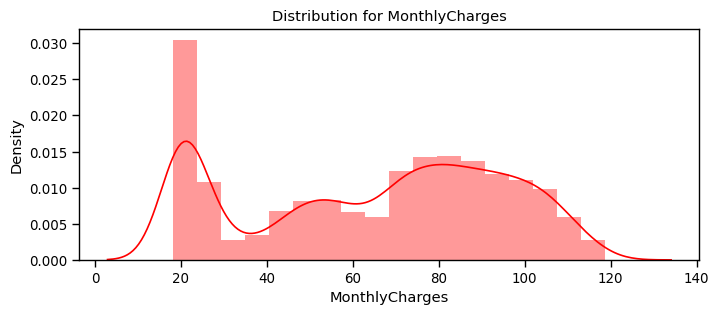

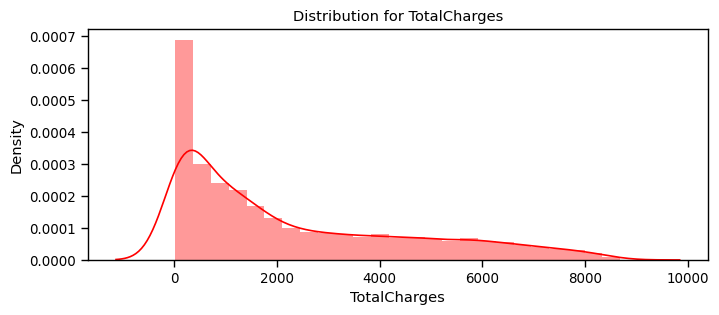

In [1332]:
# List of numerical features to create distribution plots for
numerical_columns = ["tenure", 'MonthlyCharges', 'TotalCharges']

# Loop through each numerical feature and create a distribution plot
for feature in numerical_columns:
    # Call the distplot function to create a distribution plot for the current feature
    distplot(feature, df)

<h2>Standardizing numeric attributes</h2>

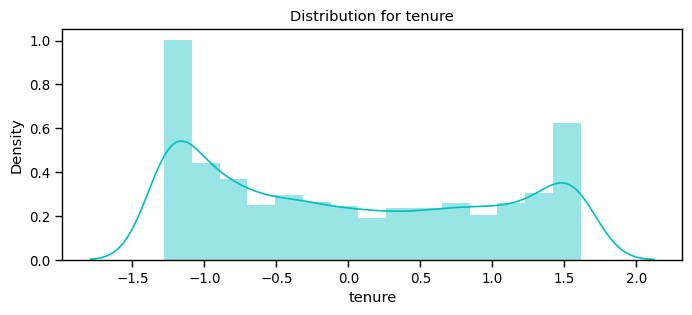

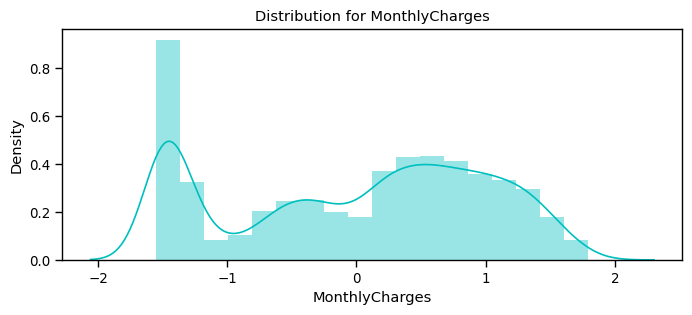

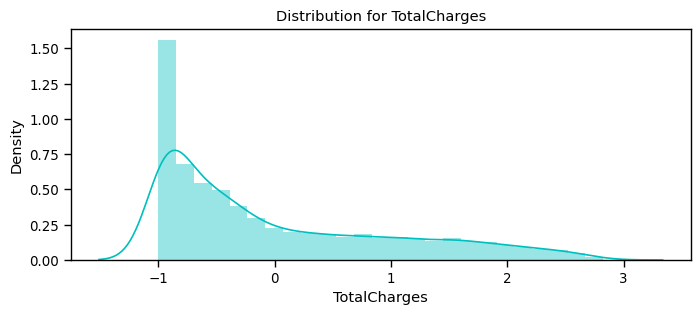

In [1333]:
# Create a DataFrame with standardized numerical features
df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')),
                      columns=numerical_cols)

# List of standardized numerical features to create distribution plots for
standardized_numerical_cols = numerical_cols

# Loop through each standardized numerical feature and create a distribution plot with custom color
for feat in standardized_numerical_cols:
    # Call the distplot function to create a distribution plot for the current feature with a custom color
    distplot(feat, df_std, color='c')

In [1334]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

# Categorical columns for one-hot encoding
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

# Categorical columns for label encoding
cat_cols_le = list(set(X_train.columns) - set(numerical_cols) - set(cat_cols_ohe))

In [1335]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize numerical columns in the training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Standardize numerical columns in the test set
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

<h1> Machine Learning Model Evaluations and Predictions </h1>

<h2>K-Nearest Neighbors</h2>

In [1336]:
# Create a KNeighborsClassifier model with 11 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=11)

# Fit the KNeighborsClassifier model on the training data
knn_classifier.fit(X_train, y_train)

# Predict the target values for the test data
predicted_y_knn = knn_classifier.predict(X_test)

# Calculate the accuracy of the K-Nearest Neighbors model
accuracy_knn = knn_classifier.score(X_test, y_test)

# Print the accuracy of the K-Nearest Neighbors model
print("K-Nearest Neighbors accuracy is:", accuracy_knn)

K-Nearest Neighbors accuracy is: 0.7753554502369668


In [1337]:
# Print the classification report for the predicted values of K-Nearest Neighbors model
print(classification_report(y_test, predicted_y_knn))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<h2> Random Forest </h2>

In [1338]:
# Create a RandomForestClassifier model with specified parameters
random_forest_classifier = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                                  random_state=50, max_features="auto",
                                                  max_leaf_nodes=30)

# Fit the RandomForestClassifier model on the training data
random_forest_classifier.fit(X_train, y_train)

# Predict the target values for the test data
predicted_y_rf = random_forest_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = metrics.accuracy_score(y_test, predicted_y_rf)

# Print the accuracy of the Random Forest model
print("Random Forest accuracy is:", accuracy_rf)

Random Forest accuracy is: 0.8137440758293839


In [1339]:
# Print the classification report for the predicted values of Random Forest model
print(classification_report(y_test, predicted_y_rf))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



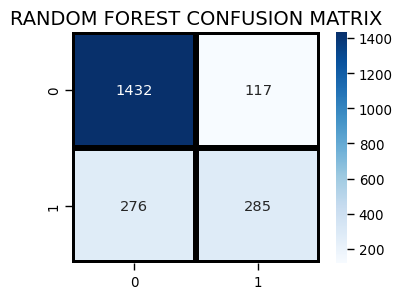

In [1340]:
# Set the figure size
plt.figure(figsize=(4, 3))

# Create a heatmap for the confusion matrix of the Random Forest model
sns.heatmap(confusion_matrix(y_test, predicted_y_rf),
            annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")

# Set the title for the confusion matrix
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)

# Show the plot
plt.show()

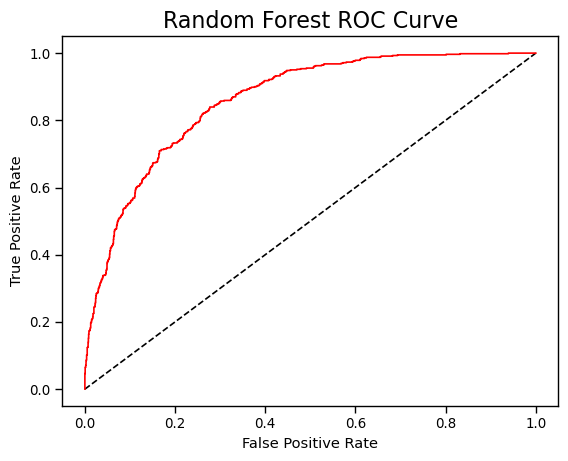

In [1341]:
# Get predicted probabilities for the positive class from the Random Forest model
y_rf_pred_prob = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds for the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_pred_prob)

# Plot the ROC curve for the Random Forest model
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

<h2> Logistic Regression </h2>

In [1342]:
# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()
# Fit the Logistic Regression model on the training data
logistic_regression_model.fit(X_train, y_train)
# Calculate the accuracy of the Logistic Regression model
accuracy_lr = logistic_regression_model.score(X_test, y_test)
# Print the accuracy of the Logistic Regression model
print("Logistic Regression accuracy is:", accuracy_lr)

Logistic Regression accuracy is: 0.8090047393364929


In [1343]:
# Predict the target values for the test data using the Logistic Regression model
predicted_y_lr = logistic_regression_model.predict(X_test)
# Generate the classification report for the Logistic Regression model
classification_report_lr = classification_report(y_test, predicted_y_lr)
# Print the classification report for the Logistic Regression model
print(classification_report_lr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



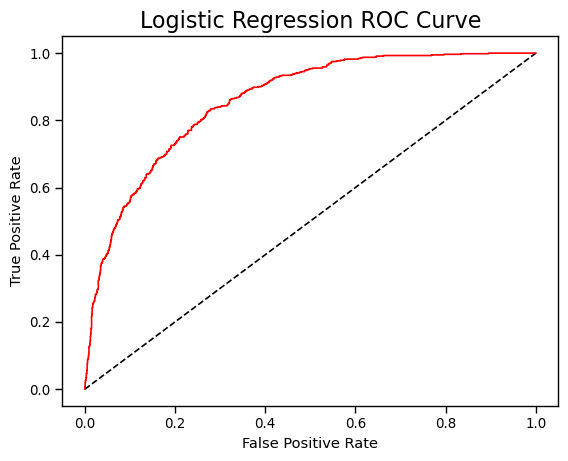

In [1344]:
# Get predicted probabilities for the positive class from the Logistic Regression model
y_lr_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
# Compute false positive rate, true positive rate, and thresholds for the ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_pred_prob)
# Plot the ROC curve for the Logistic Regression model
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

<h1>Hyperparameter Tuning</h1>

<h2> Hyperparameter Tuning for KNN</h2>

In [1345]:
knn_parameter = {'n_neighbors': 5, 'weights': 'uniform', 'p': 2}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 1")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 1
Accuracy: 76.68%
Precision:56.47%
Recall:53.65%
F1 Score55.03%
Error Rate:23.32%


In [1346]:
knn_parameter = {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 2")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 2
Accuracy: 74.79%
Precision:52.56%
Recall:53.12%
F1 Score52.84%
Error Rate:25.21%


In [1347]:
knn_parameter = {'n_neighbors': 2, 'weights': 'uniform', 'p': 2}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 3")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 3
Accuracy: 75.21%
Precision:56.46%
Recall:29.59%
F1 Score38.83%
Error Rate:24.79%


In [1348]:
knn_parameter = {'n_neighbors': 1, 'weights': 'uniform', 'p': 1}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 4")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 4
Accuracy: 71.85%
Precision:47.31%
Recall:51.69%
F1 Score49.40%
Error Rate:28.15%


In [1349]:
knn_parameter = {'n_neighbors': 2, 'weights': 'distance', 'p': 1}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 5")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 5
Accuracy: 71.80%
Precision:47.20%
Recall:51.16%
F1 Score49.10%
Error Rate:28.20%


In [1350]:
knn_parameter = {'n_neighbors': 7, 'weights': 'uniform', 'p': 2}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 6")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 6
Accuracy: 77.68%
Precision:58.65%
Recall:54.37%
F1 Score56.43%
Error Rate:22.32%


In [1351]:
knn_parameter = {'n_neighbors': 6, 'weights': 'distance', 'p': 2}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 7")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 7
Accuracy: 76.26%
Precision:55.75%
Recall:51.87%
F1 Score53.74%
Error Rate:23.74%


In [1352]:
knn_parameter = {'n_neighbors': 8, 'weights': 'uniform', 'p': 2}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 8")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 8
Accuracy: 77.73%
Precision:61.70%
Recall:42.78%
F1 Score50.53%
Error Rate:22.27%


In [1353]:
knn_parameter = {'n_neighbors': 4, 'weights': 'distance', 'p': 1}
knn_model = KNeighborsClassifier(**knn_parameter)

knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred,zero_division=1) * 100
knn_recall = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum()))*100

print("Metrics with Hyperparameter Tuning: 9")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision:{:.2f}%".format(knn_precision))
print("Recall:{:.2f}%".format(knn_recall))
print("F1 Score{:.2f}%".format(knn_f1))
print("Error Rate:{:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 9
Accuracy: 74.83%
Precision:52.68%
Recall:52.58%
F1 Score52.63%
Error Rate:25.17%


In [1354]:
# Define hyperparameters for KNN with tuning: 10
knn_parameter = {'n_neighbors': 10, 'weights': 'uniform', 'p': 1}

# Create KNN model with specified hyperparameters
knn_model = KNeighborsClassifier(**knn_parameter)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate performance metrics
knn_accuracy = accuracy_score(y_test, knn_y_pred_1) * 100
knn_precision = precision_score(y_test, knn_y_pred, zero_division=1) * 100
knn_recall_1 = recall_score(y_test, knn_y_pred) * 100
knn_f1 = f1_score(y_test, knn_y_pred) * 100
conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_error_rate = ((conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum())) * 100

# Print the metrics
print("Metrics with Hyperparameter Tuning: 10")
print("Accuracy: {:.2f}%".format(knn_accuracy))
print("Precision: {:.2f}%".format(knn_precision))
print("Recall: {:.2f}%".format(knn_recall))
print("F1 Score: {:.2f}%".format(knn_f1))
print("Error Rate: {:.2f}%".format(knn_error_rate))

Metrics with Hyperparameter Tuning: 10
Accuracy: 77.96%
Precision: 60.57%
Recall: 52.58%
F1 Score: 54.19%
Error Rate: 22.04%


<h2> Logistic Regression HyperParameterTunning</h2>

In [1355]:
# Assuming you have X_train, X_test, y_train, and y_test already defined

# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model One Logistic Regression
model_one_lr = LogisticRegression(C=0.1, penalty='l2', solver='sag', random_state=5)
model_one_lr.fit(X_train, y_train)

# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_one_pred = model_one_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_one_pred) * 100
rf_precision = precision_score(y_test, model_one_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_one_pred) * 100
rf_f1 = f1_score(y_test, model_one_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_one_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 1:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 1:
Accuracy: 81.23%
Precision: 67.22%
Recall: 57.40%
F1 Score: 61.92%
Error Rate: 18.77%


In [1356]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model two Logistic Regression
model_two_lr = LogisticRegression(C=0.25, penalty='l2', solver='newton-cg', random_state=25)
model_two_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_two_pred = model_two_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_two_pred) * 100
rf_precision = precision_score(y_test, model_two_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_two_pred) * 100
rf_f1 = f1_score(y_test, model_two_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_two_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 2:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 2:
Accuracy: 81.00%
Precision: 66.39%
Recall: 57.75%
F1 Score: 61.77%
Error Rate: 19.00%


In [1357]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model three Logistic Regression
model_three_lr = LogisticRegression(C=0.5, penalty='l1', solver='saga', random_state=45)
model_three_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_three_pred = model_three_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_three_pred) * 100
rf_precision = precision_score(y_test, model_three_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_three_pred) * 100
rf_f1 = f1_score(y_test, model_three_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_three_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 3:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 3:
Accuracy: 80.71%
Precision: 65.59%
Recall: 57.75%
F1 Score: 61.42%
Error Rate: 19.29%


In [1358]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model Four Logistic Regression
model_four_lr = LogisticRegression(C=0.02, penalty='l2', solver='liblinear', random_state=65)
model_four_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_four_pred = model_four_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_four_pred) * 100
rf_precision = precision_score(y_test, model_four_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_four_pred) * 100
rf_f1 = f1_score(y_test, model_four_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_four_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 4:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 4:
Accuracy: 81.28%
Precision: 67.89%
Recall: 56.15%
F1 Score: 61.46%
Error Rate: 18.72%


In [1359]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model Five Logistic Regression
model_five_lr = LogisticRegression(C=10, penalty='none', solver='lbfgs', random_state=85)
model_five_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_five_pred = model_five_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_five_pred) * 100
rf_precision = precision_score(y_test, model_five_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_five_pred) * 100
rf_f1 = f1_score(y_test, model_five_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_five_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 5:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 5:
Accuracy: 80.95%
Precision: 66.06%
Recall: 58.29%
F1 Score: 61.93%
Error Rate: 19.05%


In [1360]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model six Logistic Regression
model_six_lr = LogisticRegression(C=0.01, penalty='l2', solver='sag', random_state=55)
model_six_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_six_pred = model_six_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_six_pred) * 100
rf_precision = precision_score(y_test, model_six_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_six_pred) * 100
rf_f1 = f1_score(y_test, model_six_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_six_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 6:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 6:
Accuracy: 81.18%
Precision: 69.62%
Recall: 51.87%
F1 Score: 59.45%
Error Rate: 18.82%


In [1361]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model One Logistic Regression
model_7_lr = LogisticRegression(C=5.5, penalty='l1', solver='liblinear', random_state=65)
model_7_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_7_pred = model_7_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_7_pred) * 100
rf_precision = precision_score(y_test, model_7_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_7_pred) * 100
rf_f1 = f1_score(y_test, model_7_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_7_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 7:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))


Metrics with Hyperparameter tuning for Logistic Regression 7:
Accuracy: 80.85%
Precision: 65.86%
Recall: 58.11%
F1 Score: 61.74%
Error Rate: 19.15%


In [1362]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model One Logistic Regression
model_8_lr = LogisticRegression(C=10.5, penalty='l2', solver='newton-cg', random_state=5)
model_8_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_8_pred = model_8_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_8_pred) * 100
rf_precision = precision_score(y_test, model_8_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_8_pred) * 100
rf_f1 = f1_score(y_test, model_8_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_8_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 8:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 8:
Accuracy: 80.90%
Precision: 65.93%
Recall: 58.29%
F1 Score: 61.87%
Error Rate: 19.10%


In [1363]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model One Logistic Regression
model_9_lr = LogisticRegression(C=0.2, penalty='l2', solver='newton-cg', random_state=0)
model_9_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_9_pred = model_9_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_9_pred) * 100
rf_precision = precision_score(y_test, model_9_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_9_pred) * 100
rf_f1 = f1_score(y_test, model_9_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_9_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 9:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 9:
Accuracy: 81.04%
Precision: 66.46%
Recall: 57.93%
F1 Score: 61.90%
Error Rate: 18.96%


In [1364]:
# Base Logistic Regression
lr_base = LogisticRegression(random_state=0)
lr_base.fit(X_train, y_train)

# Model One Logistic Regression
model_ten_lr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=5)
model_ten_lr.fit(X_train, y_train)



# Making predictions
lr_base_pred = lr_base.predict(X_test)
model_ten_pred = model_ten_lr.predict(X_test)


# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, model_ten_pred) * 100
rf_precision = precision_score(y_test, model_ten_pred, zero_division=1) * 100
rf_recall = recall_score(y_test, model_ten_pred) * 100
rf_f1 = f1_score(y_test, model_ten_pred) * 100
rf_conf_matrix = confusion_matrix(y_test, model_ten_pred)
rf_error_rate = ((rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]) / float(rf_conf_matrix.sum())) * 100

print("Metrics with Hyperparameter tuning for Logistic Regression 10:")
print("Accuracy: {:.2f}%".format(rf_accuracy))
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1 Score: {:.2f}%".format(rf_f1))
print("Error Rate: {:.2f}%".format(rf_error_rate))

Metrics with Hyperparameter tuning for Logistic Regression 10:
Accuracy: 80.47%
Precision: 65.30%
Recall: 56.68%
F1 Score: 60.69%
Error Rate: 19.53%


<h2> Hyperparameter Tuning for Random Forest</h2>

In [1365]:
# Initializing base Random Forest Clasifier
rf_base = RandomForestClassifier(random_state = 8)

In [1366]:
#Hyperparameters for RandomForestClassifier with their values
# 'n_estimators': [10, 30, 50, 70, 100),
# 'criterion': ['gint', 'entropy"],
#'max_depth: [2, 3, 4],

In [1367]:
#Initializing five other Random Forest Classifier with different HyoerParameters
model_one = RandomForestClassifier(n_estimators=10, criterion = 'gini', max_depth=2, random_state=42) 
model_two = RandomForestClassifier(n_estimators=30, criterion = 'gini', max_depth=2, random_state=5) 
model_three = RandomForestClassifier(n_estimators=58, criterion = 'entropy', max_depth=4, random_state=25) 
model_four = RandomForestClassifier(n_estimators=78, criterion = 'entropy', max_depth=3, random_state=0) 
model_five = RandomForestClassifier(n_estimators=180, criterion = 'entropy', max_depth=4, random_state=88) 
model_six = RandomForestClassifier(n_estimators=20, criterion = 'gini', max_depth=3, random_state=60) 
model_seven = RandomForestClassifier(n_estimators=48, criterion = 'gini', max_depth=5, random_state=180)
model_eight = RandomForestClassifier(n_estimators=60, criterion= 'entropy', max_depth=9, random_state=120) 
model_nine = RandomForestClassifier(n_estimators=90, criterion ='gini', max_depth=12, random_state=150)
model_ten = RandomForestClassifier(n_estimators=85, criterion ='entropy', max_depth=10, random_state=75)

In [1368]:
#Training the initialized Random Forest Classifier
rf_base.fit(X_train, y_train) 
model_one.fit(X_train, y_train)
model_two.fit(X_train, y_train) 
model_three.fit(X_train, y_train)
model_four.fit(X_train, y_train)
model_five.fit(X_train, y_train)
model_six.fit(X_train, y_train)
model_seven.fit(X_train, y_train)
model_eight.fit(X_train, y_train)
model_nine.fit(X_train, y_train)
model_ten.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=85,
                       random_state=75)

In [1369]:
#Using Random Forest classifier to make predictions
rf_base_pred = rf_base.predict(X_test)
model_one_pred = model_one.predict(X_test) 
model_two_pred = model_two.predict(X_test)
model_three_pred = model_three.predict(X_test)
model_four_pred = model_four.predict(X_test) 
model_five_pred = model_five.predict(X_test)
model_six_pred = model_six.predict(X_test) 
model_seven_pred = model_seven.predict(X_test) 
model_eight_pred = model_eight.predict(X_test) 
model_nine_pred = model_nine.predict(X_test)
model_ten_pred = model_ten.predict(X_test)

In [1370]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_models(true_labels, model_preds):
    # Create an empty list to store results for each model
    all_results = []

    # Iterate over each model's predictions
    for model_name, pred_labels in model_preds.items():
        # Calculate classification metrics
        accuracy_value = accuracy_score(true_labels, pred_labels)
        precision_value = precision_score(true_labels, pred_labels, zero_division=1)
        recall_value = recall_score(true_labels, pred_labels)
        f1_value = f1_score(true_labels, pred_labels)

        # Calculate error rate
        error_rate = ((pred_labels != true_labels).sum() / len(true_labels)) * 100

        # Store results in a dictionary
        model_results = {
            'Model': model_name,
            'Accuracy': f'{round(accuracy_value * 100, 2)} %',
            'Precision': f'{round(precision_value * 100, 2)} %',
            'Recall': f'{round(recall_value * 100, 2)} %',
            'F1': f'{round(f1_value * 100, 2)} %',
            'Error Rate': f'{round(error_rate, 2)} %'
        }

        # Append results for the current model to the list
        all_results.append(model_results)

    # Create a Pandas DataFrame from the list of results
    metrics_df = pd.DataFrame(all_results)

    # Return the DataFrame containing metrics for each model
    return metrics_df


In [1371]:
# Dictionary containing model predictions
model_preds = {
    'Base Model': rf_base_pred,
    'Model One': model_one_pred,
    'Model Two': model_two_pred,
    'Model Three': model_three_pred,
    'Model Four': model_four_pred,
    'Model Five': model_five_pred,
    'Model Six': model_six_pred,
    'Model Seven': model_seven_pred,
    'Model Eight': model_eight_pred,
    'Model Nine': model_nine_pred,
    'Model Ten': model_ten_pred,
}

# Evaluate models and store results in a DataFrame
results_df = evaluate_models(y_test, model_preds)

# Print the results DataFrame with model names set as the index
print(results_df.set_index("Model"))

            Accuracy Precision   Recall       F1 Error Rate
Model                                                      
Base Model   79.24 %   63.34 %  52.05 %  57.14 %    20.76 %
Model One    78.29 %   71.02 %  31.02 %  43.18 %    21.71 %
Model Two    77.73 %   72.86 %  25.85 %  38.16 %    22.27 %
Model Three  79.43 %   68.09 %   42.6 %  52.41 %    20.57 %
Model Four   79.15 %   73.73 %  33.51 %  46.08 %    20.85 %
Model Five   79.81 %   69.79 %  42.42 %  52.77 %    20.19 %
Model Six    78.39 %   74.88 %  28.16 %  40.93 %    21.61 %
Model Seven  80.28 %   69.86 %  45.45 %  55.08 %    19.72 %
Model Eight  80.85 %   68.21 %  52.41 %  59.27 %    19.15 %
Model Nine   80.47 %   66.16 %  54.37 %  59.69 %    19.53 %
Model Ten    80.66 %   66.81 %  54.19 %  59.84 %    19.34 %
